In [35]:
import pickle
import numpy as np
from keras.models import Sequential
from gensim import models
from keras.layers import LSTM, SimpleRNN
from sklearn.model_selection import train_test_split
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [25]:
from gensim import models
import pickle

# w2v_en = models.Word2Vec.load('word2vec.bin');
# w2v_br = models.KeyedVectors.load_word2vec_format("wiki.pt.trigram.vector", binary=True)
w2v = models.KeyedVectors.load_word2vec_format("cbow_s50.txt")

In [15]:
with open('conversation_br.pickle', 'rb') as f:
    vec_x, vec_y = pickle.load(f)

In [16]:
vec_x = np.array(vec_x, dtype=np.float32)
vec_y = np.array(vec_y, dtype=np.float32)

x_train, x_test, y_train, y_test = train_test_split(vec_x, vec_y, test_size=0.2, random_state=1)

In [19]:
x_train.shape[1:]

(15, 50)

In [27]:

model=Sequential()
model.add(LSTM(400, input_shape=x_train.shape[1:], return_sequences=True, kernel_initializer='glorot_normal', recurrent_initializer='glorot_normal', activation='sigmoid'))
#model.add(LSTM(400, return_sequences=True, kernel_initializer='glorot_normal', recurrent_initializer='glorot_normal', activation='sigmoid'))
#model.add(LSTM(400, return_sequences=True, kernel_initializer='glorot_normal', recurrent_initializer='glorot_normal', activation='sigmoid'))
model.add(LSTM(50, return_sequences=True, kernel_initializer='glorot_normal', recurrent_initializer='glorot_normal', activation='sigmoid'))
model.compile(loss='cosine_proximity', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 15, 400)           721600    
_________________________________________________________________
lstm_10 (LSTM)               (None, 15, 50)            90200     
Total params: 811,800
Trainable params: 811,800
Non-trainable params: 0
_________________________________________________________________


In [28]:
hist = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test))
model.save('LSTMBR_500.h5');

Train on 68 samples, validate on 18 samples
Epoch 1/500
68/68 [==============================] - 2s 25ms/step - loss: -0.5741 - acc: 0.0088 - val_loss: -0.5283 - val_acc: 0.0259
Epoch 2/500
68/68 [==============================] - 0s 6ms/step - loss: -0.5779 - acc: 0.0294 - val_loss: -0.5322 - val_acc: 0.0222
Epoch 3/500
68/68 [==============================] - 0s 6ms/step - loss: -0.5825 - acc: 0.0245 - val_loss: -0.5367 - val_acc: 0.0259
Epoch 4/500
68/68 [==============================] - 0s 6ms/step - loss: -0.5864 - acc: 0.0255 - val_loss: -0.5400 - val_acc: 0.0259
Epoch 5/500
68/68 [==============================] - 0s 7ms/step - loss: -0.5889 - acc: 0.0294 - val_loss: -0.5429 - val_acc: 0.0296
Epoch 6/500
68/68 [==============================] - 0s 6ms/step - loss: -0.5912 - acc: 0.0343 - val_loss: -0.5457 - val_acc: 0.0296
Epoch 7/500
68/68 [==============================] - 0s 5ms/step - loss: -0.5940 - acc: 0.0343 - val_loss: -0.5485 - val_acc: 0.0296
Epoch 8/500
68/68 [=====

Epoch 62/500
68/68 [==============================] - 0s 5ms/step - loss: -0.6263 - acc: 0.0314 - val_loss: -0.5773 - val_acc: 0.0185
Epoch 63/500
68/68 [==============================] - 0s 6ms/step - loss: -0.6268 - acc: 0.0304 - val_loss: -0.5762 - val_acc: 0.0185
Epoch 64/500
68/68 [==============================] - 0s 6ms/step - loss: -0.6267 - acc: 0.0275 - val_loss: -0.5763 - val_acc: 0.0259
Epoch 65/500
68/68 [==============================] - 0s 6ms/step - loss: -0.6269 - acc: 0.0373 - val_loss: -0.5767 - val_acc: 0.0222
Epoch 66/500
68/68 [==============================] - 1s 8ms/step - loss: -0.6272 - acc: 0.0402 - val_loss: -0.5772 - val_acc: 0.0185
Epoch 67/500
68/68 [==============================] - 0s 6ms/step - loss: -0.6272 - acc: 0.0402 - val_loss: -0.5778 - val_acc: 0.0074
Epoch 68/500
68/68 [==============================] - 0s 7ms/step - loss: -0.6275 - acc: 0.0363 - val_loss: -0.5797 - val_acc: 0.0037
Epoch 69/500
68/68 [==============================] - 1s 8ms/s

Epoch 123/500
68/68 [==============================] - 0s 5ms/step - loss: -0.6374 - acc: 0.0382 - val_loss: -0.5820 - val_acc: 0.0000e+00
Epoch 124/500
68/68 [==============================] - 0s 4ms/step - loss: -0.6350 - acc: 0.0422 - val_loss: -0.5819 - val_acc: 0.0037
Epoch 125/500
68/68 [==============================] - 0s 5ms/step - loss: -0.6367 - acc: 0.0422 - val_loss: -0.5757 - val_acc: 0.0037
Epoch 126/500
68/68 [==============================] - 0s 6ms/step - loss: -0.6352 - acc: 0.0422 - val_loss: -0.5791 - val_acc: 0.0074
Epoch 127/500
68/68 [==============================] - 0s 5ms/step - loss: -0.6373 - acc: 0.0402 - val_loss: -0.5832 - val_acc: 0.0222
Epoch 128/500
68/68 [==============================] - 0s 5ms/step - loss: -0.6371 - acc: 0.0490 - val_loss: -0.5820 - val_acc: 0.0074
Epoch 129/500
68/68 [==============================] - 0s 6ms/step - loss: -0.6378 - acc: 0.0431 - val_loss: -0.5784 - val_acc: 0.0037
Epoch 130/500
68/68 [==============================

68/68 [==============================] - 0s 6ms/step - loss: -0.6586 - acc: 0.0451 - val_loss: -0.5739 - val_acc: 0.0222
Epoch 184/500
68/68 [==============================] - 0s 5ms/step - loss: -0.6596 - acc: 0.0549 - val_loss: -0.5718 - val_acc: 0.0148
Epoch 185/500
68/68 [==============================] - 0s 7ms/step - loss: -0.6589 - acc: 0.0569 - val_loss: -0.5714 - val_acc: 0.0148
Epoch 186/500
68/68 [==============================] - 0s 6ms/step - loss: -0.6605 - acc: 0.0667 - val_loss: -0.5701 - val_acc: 0.0222
Epoch 187/500
68/68 [==============================] - 0s 5ms/step - loss: -0.6625 - acc: 0.0578 - val_loss: -0.5697 - val_acc: 0.0074
Epoch 188/500
68/68 [==============================] - 0s 5ms/step - loss: -0.6620 - acc: 0.0490 - val_loss: -0.5673 - val_acc: 0.0185
Epoch 189/500
68/68 [==============================] - 0s 6ms/step - loss: -0.6572 - acc: 0.0539 - val_loss: -0.5683 - val_acc: 0.0148
Epoch 190/500
68/68 [==============================] - 0s 7ms/step - 

Epoch 244/500
68/68 [==============================] - 0s 6ms/step - loss: -0.6799 - acc: 0.0627 - val_loss: -0.5673 - val_acc: 0.0407
Epoch 245/500
68/68 [==============================] - 0s 4ms/step - loss: -0.6838 - acc: 0.0794 - val_loss: -0.5667 - val_acc: 0.0259
Epoch 246/500
68/68 [==============================] - 0s 6ms/step - loss: -0.6834 - acc: 0.0667 - val_loss: -0.5664 - val_acc: 0.0148
Epoch 247/500
68/68 [==============================] - 0s 6ms/step - loss: -0.6847 - acc: 0.0510 - val_loss: -0.5688 - val_acc: 0.0185
Epoch 248/500
68/68 [==============================] - 0s 6ms/step - loss: -0.6829 - acc: 0.0559 - val_loss: -0.5689 - val_acc: 0.0185
Epoch 249/500
68/68 [==============================] - 0s 5ms/step - loss: -0.6841 - acc: 0.0627 - val_loss: -0.5671 - val_acc: 0.0370
Epoch 250/500
68/68 [==============================] - 0s 5ms/step - loss: -0.6851 - acc: 0.0676 - val_loss: -0.5657 - val_acc: 0.0222
Epoch 251/500
68/68 [==============================] - 

68/68 [==============================] - 0s 6ms/step - loss: -0.7103 - acc: 0.0755 - val_loss: -0.5595 - val_acc: 0.0185
Epoch 305/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7099 - acc: 0.0618 - val_loss: -0.5621 - val_acc: 0.0148
Epoch 306/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7120 - acc: 0.0922 - val_loss: -0.5544 - val_acc: 0.0296
Epoch 307/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7088 - acc: 0.1010 - val_loss: -0.5527 - val_acc: 0.0111
Epoch 308/500
68/68 [==============================] - 0s 4ms/step - loss: -0.7085 - acc: 0.0843 - val_loss: -0.5578 - val_acc: 0.0111
Epoch 309/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7085 - acc: 0.0569 - val_loss: -0.5625 - val_acc: 0.0222
Epoch 310/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7105 - acc: 0.0922 - val_loss: -0.5585 - val_acc: 0.0259
Epoch 311/500
68/68 [==============================] - 0s 5ms/step - 

Epoch 365/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7277 - acc: 0.1039 - val_loss: -0.5548 - val_acc: 0.0148
Epoch 366/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7296 - acc: 0.0892 - val_loss: -0.5559 - val_acc: 0.0148
Epoch 367/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7318 - acc: 0.1010 - val_loss: -0.5536 - val_acc: 0.0148
Epoch 368/500
68/68 [==============================] - 0s 4ms/step - loss: -0.7311 - acc: 0.1176 - val_loss: -0.5488 - val_acc: 0.0185
Epoch 369/500
68/68 [==============================] - 0s 7ms/step - loss: -0.7305 - acc: 0.0892 - val_loss: -0.5548 - val_acc: 0.0259
Epoch 370/500
68/68 [==============================] - 0s 7ms/step - loss: -0.7307 - acc: 0.1039 - val_loss: -0.5515 - val_acc: 0.0185
Epoch 371/500
68/68 [==============================] - 0s 7ms/step - loss: -0.7293 - acc: 0.0882 - val_loss: -0.5583 - val_acc: 0.0148
Epoch 372/500
68/68 [==============================] - 

Epoch 426/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7383 - acc: 0.1137 - val_loss: -0.5525 - val_acc: 0.0222
Epoch 427/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7352 - acc: 0.1255 - val_loss: -0.5483 - val_acc: 0.0259
Epoch 428/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7351 - acc: 0.1118 - val_loss: -0.5551 - val_acc: 0.0222
Epoch 429/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7385 - acc: 0.1265 - val_loss: -0.5507 - val_acc: 0.0296
Epoch 430/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7394 - acc: 0.1108 - val_loss: -0.5470 - val_acc: 0.0148
Epoch 431/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7432 - acc: 0.1157 - val_loss: -0.5567 - val_acc: 0.0185
Epoch 432/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7366 - acc: 0.1167 - val_loss: -0.5511 - val_acc: 0.0222
Epoch 433/500
68/68 [==============================] - 

Epoch 487/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7549 - acc: 0.1324 - val_loss: -0.5572 - val_acc: 0.0222
Epoch 488/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7536 - acc: 0.1225 - val_loss: -0.5531 - val_acc: 0.0222
Epoch 489/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7528 - acc: 0.1127 - val_loss: -0.5498 - val_acc: 0.0444
Epoch 490/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7526 - acc: 0.1343 - val_loss: -0.5525 - val_acc: 0.0407
Epoch 491/500
68/68 [==============================] - 0s 4ms/step - loss: -0.7541 - acc: 0.1373 - val_loss: -0.5503 - val_acc: 0.0407
Epoch 492/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7534 - acc: 0.1363 - val_loss: -0.5496 - val_acc: 0.0370
Epoch 493/500
68/68 [==============================] - 0s 5ms/step - loss: -0.7546 - acc: 0.1265 - val_loss: -0.5465 - val_acc: 0.0259
Epoch 494/500
68/68 [==============================] - 

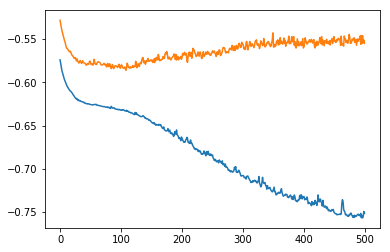

In [39]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [26]:
predictions = model.predict(x_test)

[w2v.most_similar([predictions[10][i]])[0] for i in range(15)]

[('sridevi', 0.7175910472869873),
 ('sonâmbulo', 0.6549521088600159),
 ('parahybunensis', 0.5860856175422668),
 ('estrellanus', 0.629959225654602),
 ('oligochaeta', 0.689191460609436),
 ('duodenale', 0.6419933438301086),
 ('oligochaeta', 0.6573616862297058),
 ('duodenale', 0.6444982886314392),
 ('proxies', 0.6501667499542236),
 ('duodenale', 0.6440722346305847),
 ('duodenale', 0.6400073766708374),
 ('duodenale', 0.6381053328514099),
 ('duodenale', 0.6438155174255371),
 ('oligochaeta', 0.6419497728347778),
 ('proxies', 0.6412787437438965)]